In [1]:
import pandas as pd
import urllib3
import json
import seaborn as sns

In [2]:
test_data = pd.read_csv('./data/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
http = urllib3.PoolManager()
test_data['prediction'] = ''
for d in test_data.iterrows():
    json_dump = d[1].drop(['prediction']).to_dict()
    r = http.request('GET', 'https://rishavsaigal-model-rest-api.hf.space/predict', fields=json_dump)
    test_data.loc[d[0], 'prediction'] = int(json.loads(r.data)['prediction'])

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


<AxesSubplot:xlabel='prediction'>

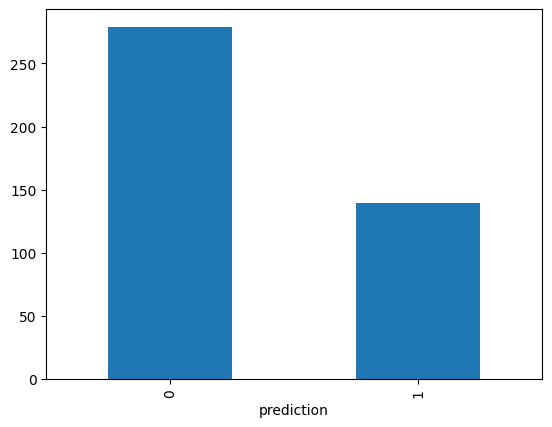

In [5]:
test_data.groupby('prediction')['PassengerId'].count().plot.bar()

<AxesSubplot:xlabel='prediction', ylabel='count'>

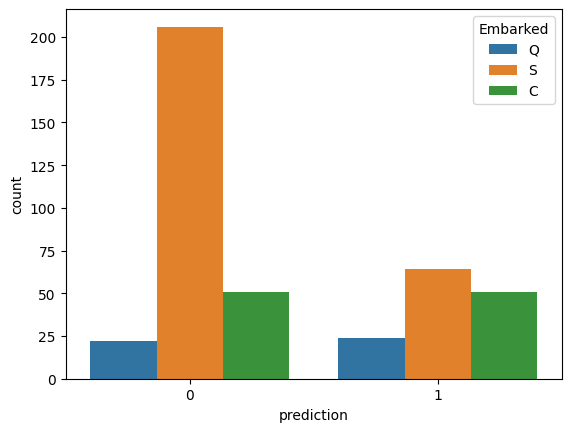

In [6]:
sns.countplot(test_data, x='prediction', hue='Embarked')

<AxesSubplot:xlabel='prediction', ylabel='count'>

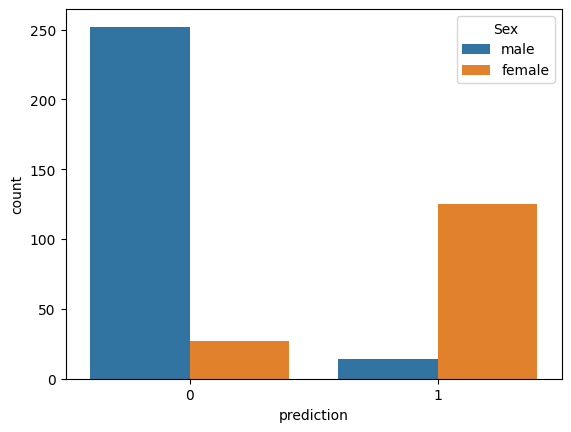

In [7]:
sns.countplot(test_data, x='prediction', hue='Sex')

<AxesSubplot:xlabel='prediction', ylabel='count'>

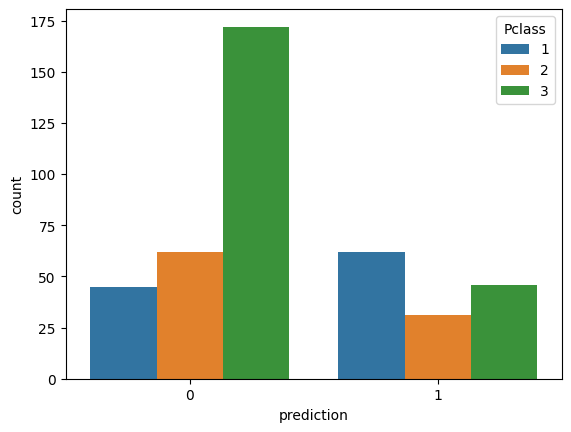

In [8]:
sns.countplot(test_data, x='prediction', hue='Pclass')